# A05

---

## Programming Environment

In [1]:
R.version.string
.libPaths()

library(dcData)
library(tidyverse)
library(mosaic)

[1] "R version 4.3.0 (2023-04-21)"

[1] "/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following object is masked from ‘package:Matrix’:

    mean


The following objects are masked from ‘package:dplyr’:

    count, d

---

In [2]:
?BabyNames

BabyNames                package:dcData                R Documentation

_N_a_m_e_s _o_f _c_h_i_l_d_r_e_n _a_s _r_e_c_o_r_d_e_d _b_y _t_h_e _U_S _S_o_c_i_a_l _S_e_c_u_r_i_t_y _A_d_m_i_n_i_s_t_r_a_t_i_o_n.

_D_e_s_c_r_i_p_t_i_o_n:

     The US Social Security Administration provides yearly lists of
     names given to babies. These data combine the yearly lists.

     `BabyNames` is the raw data from the SSA. The case is a
     year-name-sex, for example: Jane F 1922. The count is the number
     of children of that sex given that name in that year. Names
     assigned to fewer than five children of one sex in any year are
     not listed, presumably out of privacy concerns.

_U_s_a_g_e:

     data("BabyNames")
     
_F_o_r_m_a_t:

     A data frame with 1,792,091 entries on four variables:

     name The given name (character string)

     sex F or M (character string)

     count The number of babies give

In [12]:
head(x = dcData::BabyNames)

,name,sex,count,year
,<chr>,<chr>,<int>,<int>
1,Mary,F,7065,1880
2,Anna,F,2604,1880
3,Emma,F,2003,1880
4,Elizabeth,F,1939,1880
5,Minnie,F,1746,1880
6,Margaret,F,1578,1880


In [13]:
count(x = dcData::BabyNames, sex)

sex,n
<chr>,<int>
F,1062432
M,729659


In [14]:
count(x = dcData::BabyNames, year) %>%
  arrange(desc(n)) %>%
    head(n = 10)

,year,n
,<int>,<int>
1,2008,35038
2,2007,34925
3,2009,34668
4,2006,34066
5,2010,34027
6,2011,33858
7,2012,33658
8,2013,33072
9,2005,32527


In [15]:
select(.data = dcData::BabyNames, name, count) %>%
  arrange(desc(count)) %>%
    head(n = 10)

,name,count
,<chr>,<int>
1,Linda,99674
2,Linda,96210
3,James,94758
4,Michael,92711
5,Robert,91652
6,Linda,90994
7,Michael,90629
8,Michael,90512
9,James,88610


In [16]:
select(.data = dcData::BabyNames, name, count) %>%
  arrange(desc(count)) %>%
    filter(count == 5)

name,count
<chr>,<int>
Adelle,5
Adina,5
Adrienne,5
Albertine,5
Alys,5
Ana,5
Araminta,5
Arthur,5
Birtha,5


,name,sex,count,year
,<chr>,<chr>,<int>,<int>
1,Franklin,M,120,1880
2,Abraham,M,81,1880
3,Franklin,M,117,1881
4,Abraham,M,86,1881
5,Franklin,M,112,1882
6,Abraham,M,91,1882


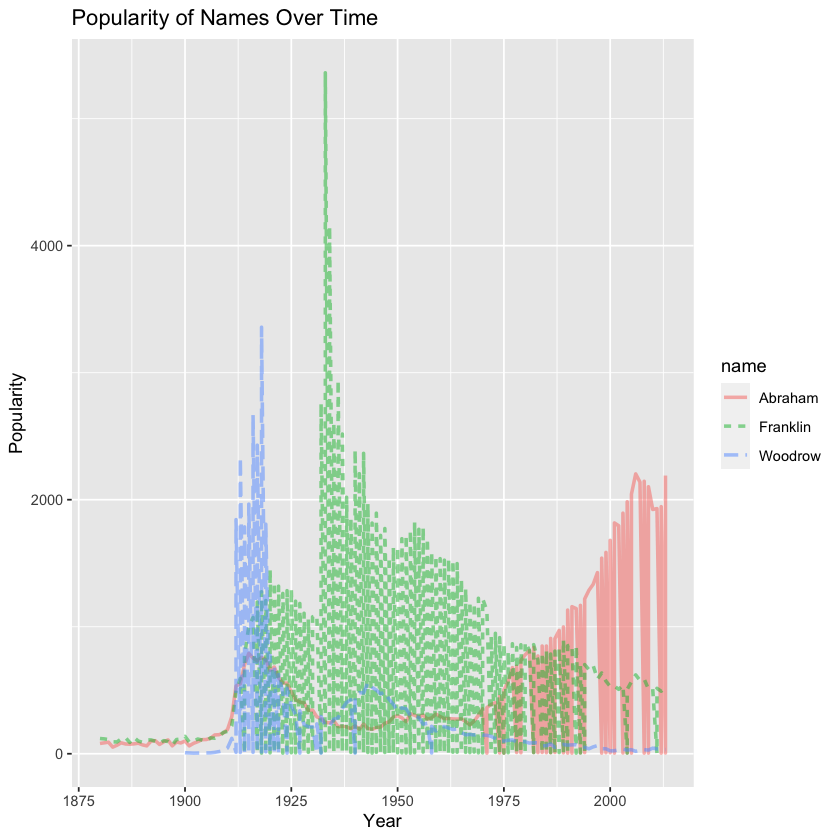

In [10]:
nonGlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Abraham', 'Franklin', 'Woodrow'))
head(x = nonGlyphReadyForm)

nonGlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = count,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1880,Abraham,81
1880,Franklin,120
1881,Abraham,86
1881,Franklin,117
1882,Abraham,91
1882,Franklin,112


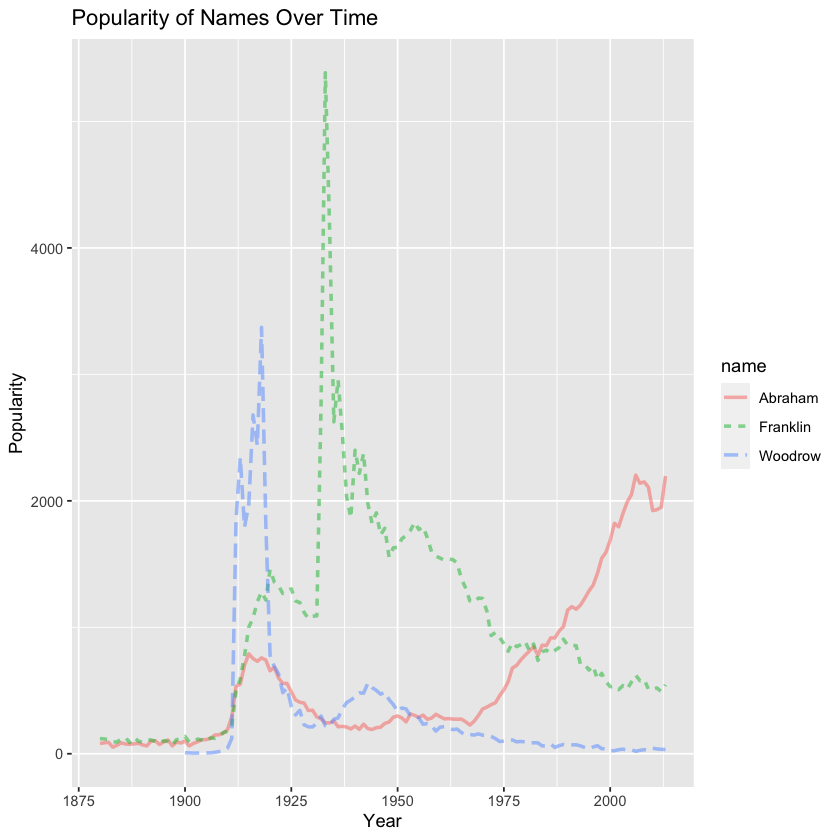

In [5]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Abraham', 'Franklin', 'Woodrow')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

---

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1880,Dave,131
1880,David,869
1881,Dave,135
1881,David,750
1882,Dave,144
1882,David,838


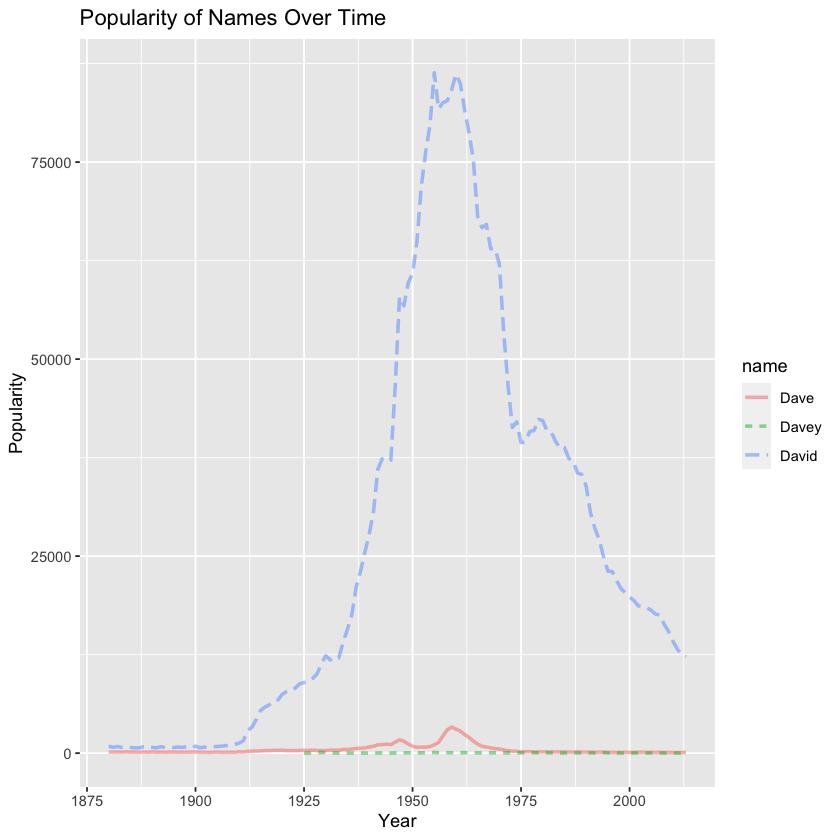

In [20]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Dave', 'Davey', 'David')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

In [ ]:
dcData::BabyNames %>%
  filter(name %in% c('Davey'))

name,sex,count,year
<chr>,<chr>,<int>,<int>
Davey,M,5,1925
Davey,M,9,1928
Davey,M,89,1929
Davey,F,5,1930
Davey,M,54,1930
Davey,M,45,1931
Davey,M,26,1932
Davey,M,15,1933
Davey,M,22,1934


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1925,Davey,5
1928,Davey,9
1929,Davey,89
1930,Davey,59
1931,Davey,45
1932,Davey,26


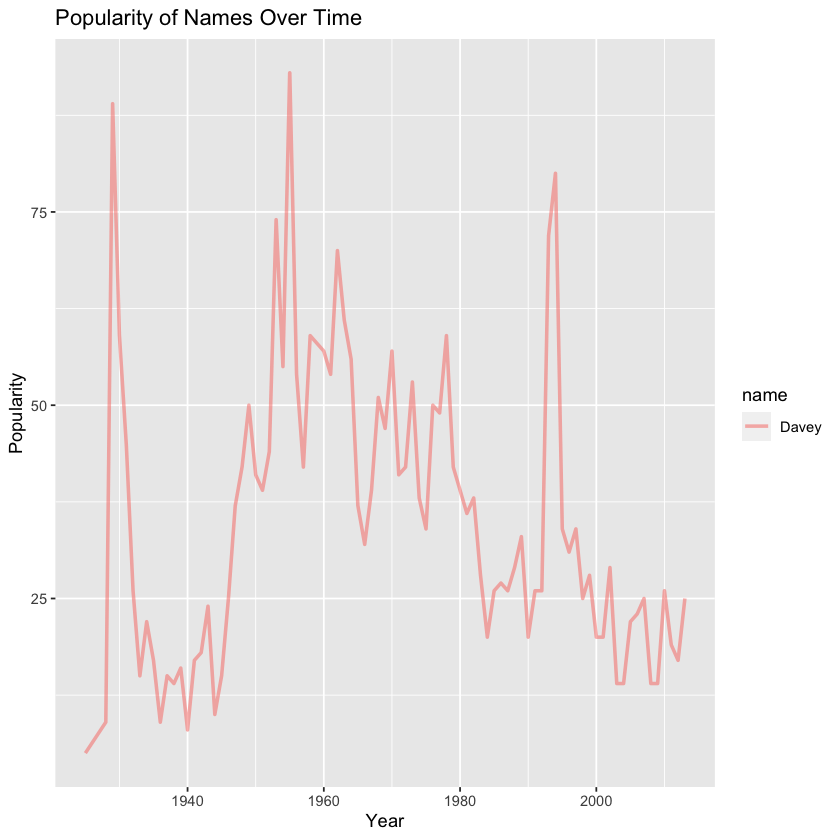

In [23]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Davey')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1880,Carol,7
1880,Caroline,306
1880,Carolyn,80
1880,Carrie,957
1881,Carol,11
1881,Caroline,316


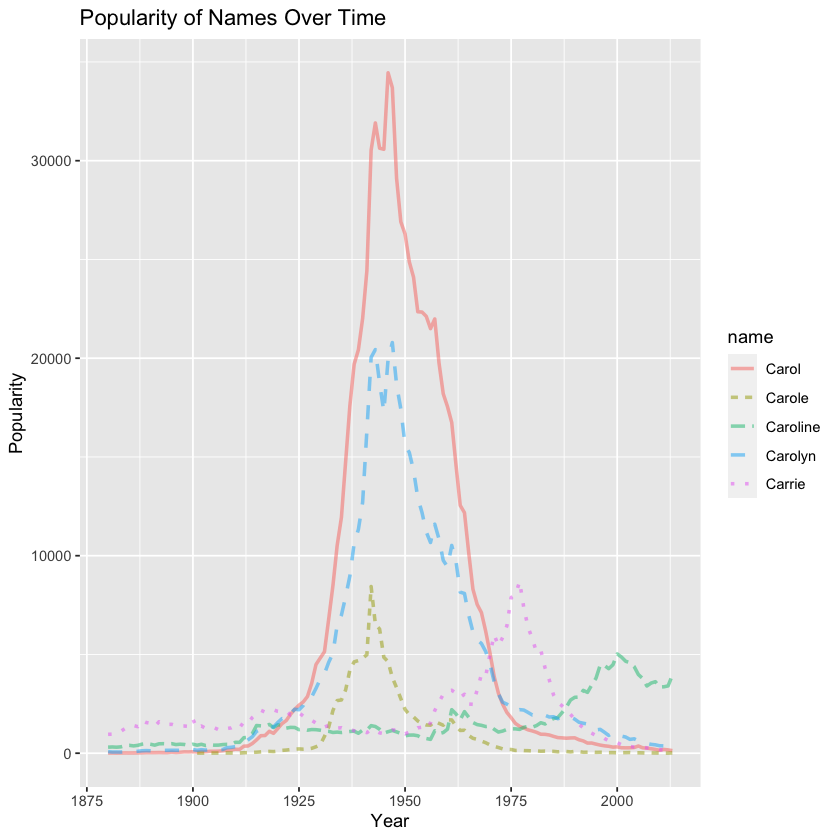

In [32]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Carol', 'Carole', 'Caroline', 'Carolyn', 'Carrie')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1880,Jeff,66
1881,Jeff,61
1882,Jeff,81
1883,Jeff,44
1884,Jeff,74
1885,Jeff,63


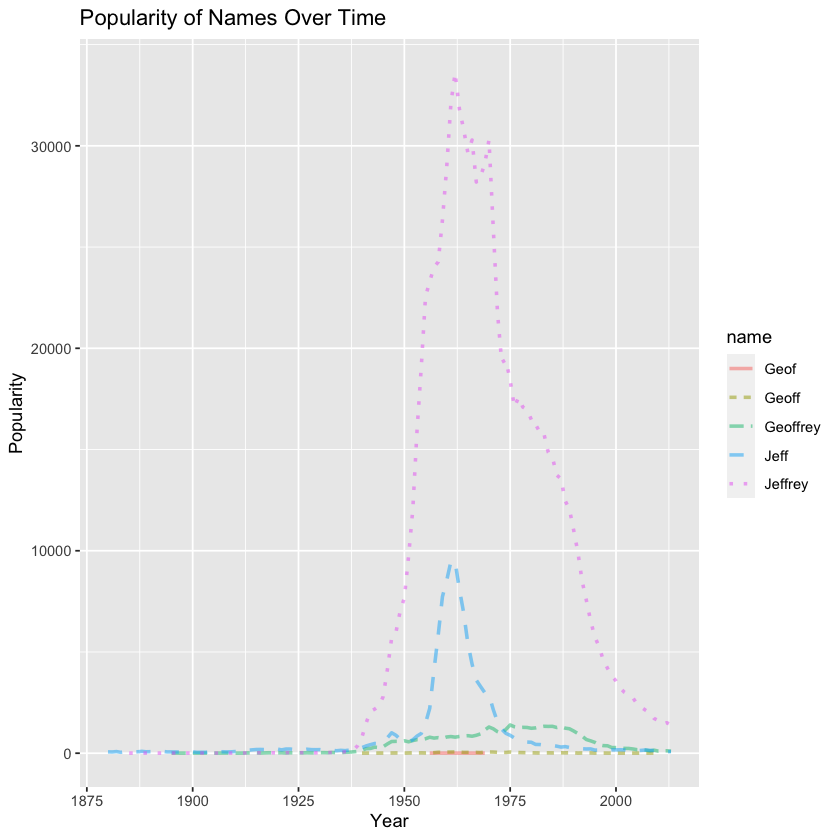

In [25]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Jeff', 'Jeffrey', 'Geof', 'Geoff', 'Geoffrey')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1940,Geoff,5
1942,Geoff,7
1943,Geoff,5
1944,Geoff,8
1945,Geoff,8
1946,Geoff,7


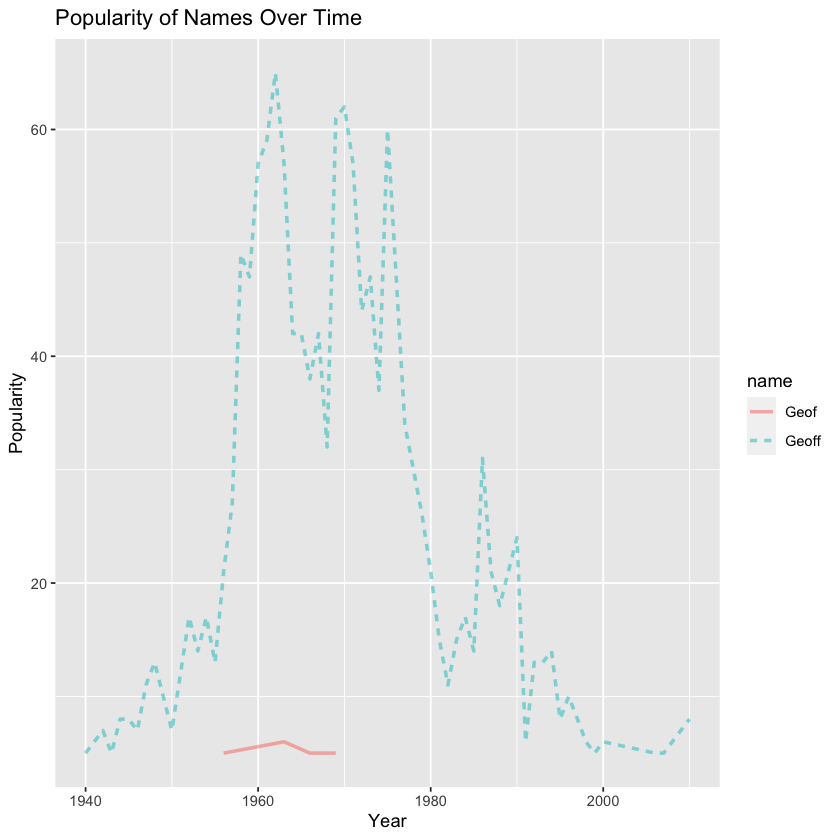

In [26]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Geof', 'Geoff')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1880,Elisa,5
1880,Elise,24
1880,Eliza,258
1880,Elizabeth,1948
1880,Ellie,17
1880,Elsa,20


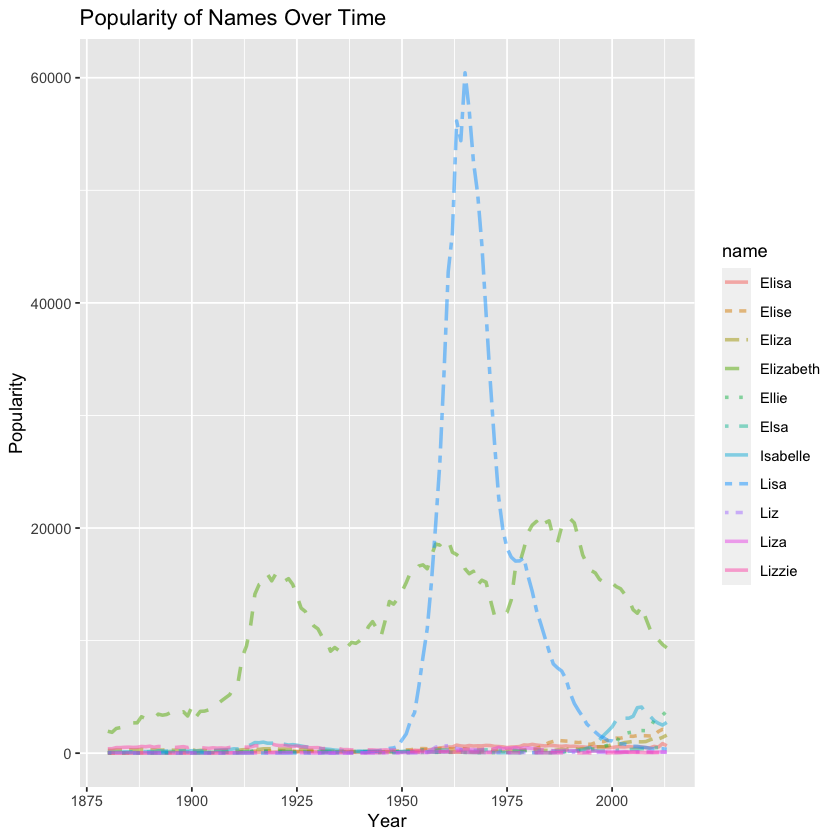

In [29]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c(
    'Elizabeth',
    'Elisa',
    'Elise',
    'Eliza',
    'Ellie',
    'Elsa',
    'Isabelle',
    'Lisa',
    'Liz',
    'Liza',
    'Lizzie'
    )) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1880,Bessie,796
1880,Betty,117
1881,Bessie,911
1881,Betty,112
1882,Bessie,1153
1882,Betty,123


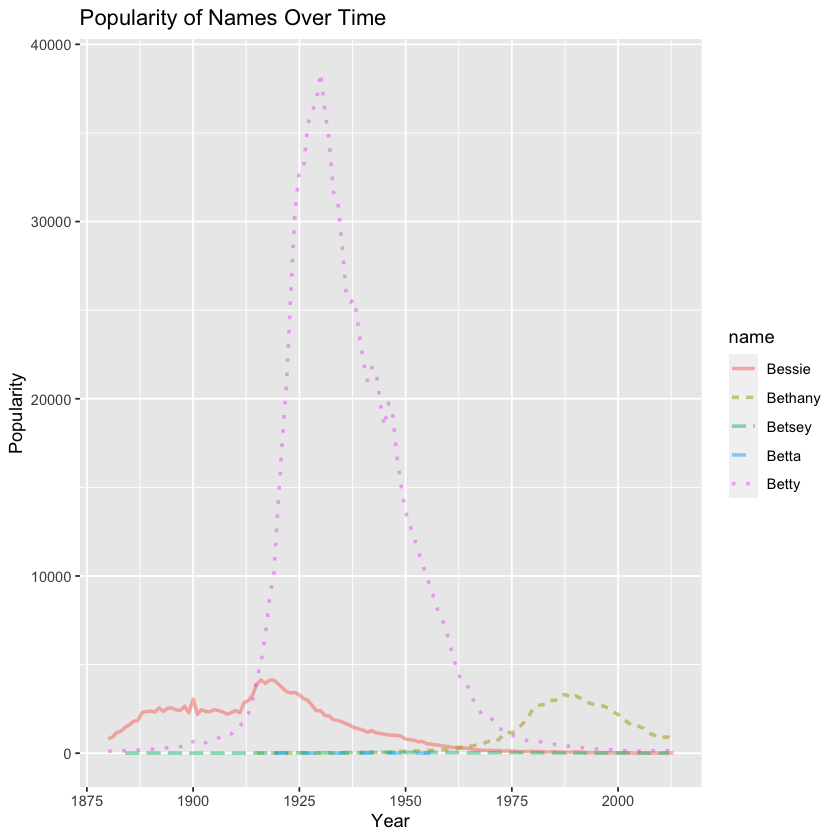

In [30]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c(
    'Bethany',
    'Bessie',
    'Betsey',
    'Betta',
    'Betty'
    )) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

---